# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q0.** Please answer the following questions in your own words.

### 1. What makes a model "linear"? "Linear" in what?

A model is "linear" if it has a linear relationship between the input variables (predictors) and the output variable (response). This means that the change in the output is directly proportional to the change in the input variables. In mathematical terms, it takes the form 
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n$, where each $\beta_i$ is a coefficient.

### 2. How do you interpret the coefficient for a dummy/one-hot-encoded variable?

The coefficient for a dummy variable represents the difference in the dependent variable $y$ between the category coded as 1 and the reference category coded as 0, holding all other variables constant. This interpretation changes if the model includes an intercept. If the model does not have an intercept, the coefficient itself can be the mean for that category.

### 3. Can linear regression be used for classification? Explain why, or why not.

Linear regression can technically be used for classification by setting a threshold on the predicted continuous values (e.g., above 0.5 for class 1 and below 0.5 for class 0). However, it is not ideal because it assumes a continuous relationship and does not handle class probabilities well. Logistic regression or other classification algorithms are better suited for classification tasks.

### 4. What are signs that your linear model is over-fitting?

Signs of over-fitting in a linear model include:

- High accuracy on training data but poor performance on validation/testing data.
- Very low training error compared to validation error.
- The model fits the noise in the data rather than the underlying pattern.

### 5. Clearly explain multi-colinearity using the two-stage least squares technique.

Multi-colinearity occurs when two or more predictor variables in a regression model are highly correlated, leading to unreliable estimates of coefficients. In two-stage least squares (2SLS), you first use an instrumental variable that is correlated with the endogenous predictor but uncorrelated with the error term. In the first stage, regress the problematic variable on the instrument and other exogenous variables. In the second stage, use the predicted values from the first stage in place of the problematic variable in the main regression model. This helps to mitigate multi-colinearity.

### 6. What are two ways to incorporate nonlinear relationships between your target and your features?

Two ways to incorporate nonlinear relationships include:

1. Polynomial features: Add polynomial terms (e.g., $x^2$, $x^3$) of the predictors to the model.
2. Interaction terms: Include products of predictors (e.g., $x_1 \times x_2$) to model interactions between variables.

### 7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

- Intercept: The expected value of the dependent variable when all predictors are zero.
- Slope coefficient: The change in the dependent variable for a one-unit change in the predictor, holding all other variables constant.
- Coefficient for a dummy variable: The difference in the dependent variable between the category coded as 1 and the reference category coded as 0.

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./data/Q1_clean.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


                     Price  Review Scores Rating
Neighbourhood                                   
Manhattan       183.664286             91.801496
Staten Island   146.166667             90.843750
Brooklyn        127.747378             92.363497
Queens           96.857233             91.549057
Bronx            75.276498             91.654378

The most expensive borough on average is: Manhattan


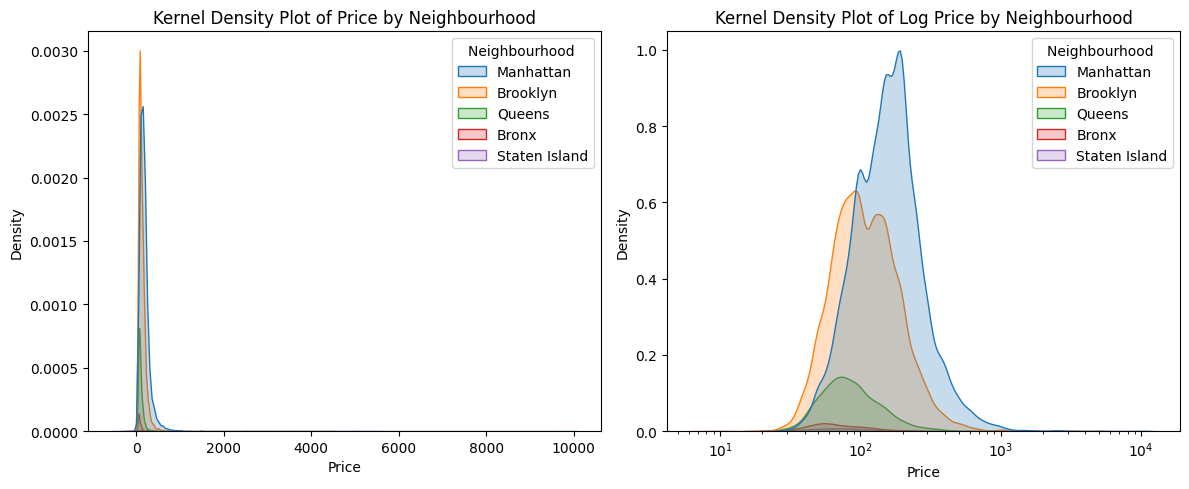

In [3]:
avg_by_neighbourhood = df.groupby('Neighbourhood ')[['Price', 'Review Scores Rating']].mean()
print(avg_by_neighbourhood.sort_values('Price', ascending=False))

most_expensive = avg_by_neighbourhood['Price'].idxmax()
print(f"\nThe most expensive borough on average is: {most_expensive}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Price', hue='Neighbourhood ', fill=True)
plt.title('Kernel Density Plot of Price by Neighbourhood')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='Price', hue='Neighbourhood ', fill=True, log_scale=True)
plt.title('Kernel Density Plot of Log Price by Neighbourhood')

plt.tight_layout()
plt.show()

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [27]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X, y)  # Run regression

results = pd.DataFrame({'variable': reg.feature_names_in_, 'coefficient': reg.coef_})  # Regression coefficients
print(results)

avg_prices = df.groupby('Neighbourhood ')['Price'].mean().sort_values(ascending=False)
print("\nAverage prices by Neighbourhood:")
print(avg_prices)

        variable  coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667

Average prices by Neighbourhood:


Neighbourhood 
Manhattan        183.664286
Staten Island    146.166667
Brooklyn         127.747378
Queens            96.857233
Bronx             75.276498
Name: Price, dtype: float64

The coefficients obtained from the regression without an intercept are identical to the average prices for each neighbourhood calculated in part 1. This pattern indicates that the regression is effectively computing the mean price for each neighbourhood since no other variables are included in the model. In this context, the coefficients represent the average price for listings in each neighbourhood, demonstrating that when regressing a continuous variable on a single categorical variable without an intercept, the coefficients reflect the group means for each category.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?


In [26]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first=True)  

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True).fit(X, y)  

results = pd.DataFrame({'variable': ['intercept'] + list(reg.feature_names_in_), 
                        'coefficient': [reg.intercept_] + list(reg.coef_)}) 
results


,variable,coefficient
0,intercept,75.276498
1,Brooklyn,52.470881
2,Manhattan,108.387789
3,Queens,21.580735
4,Staten Island,70.890169


The regression with an intercept automatically omitted one category (Bronx) to avoid multicollinearity. This omitted category becomes the reference, represented by the intercept value of 75.276498, which is the average price for Bronx listings. The coefficients for other neighborhoods now show the price difference relative to Bronx. For instance, Manhattan's coefficient of 108.387789 indicates it's about $108.39 more expensive than Bronx on average. To obtain the absolute average prices (as in part 2), add each coefficient to the intercept. For example, Manhattan's average price would be 75.276498 + 108.387789 = 183.664287, matching its coefficient from part 2. This method demonstrates how including an intercept changes coefficient interpretation from absolute averages to relative differences.

4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

X = df[['Review Scores Rating', 'Neighbourhood ']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'], 
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis=1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis=1)

model = LinearRegression(fit_intercept=False)
model.fit(Z_train, y_train)

y_pred = model.predict(Z_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² on test set: {r2:.4f}")
print(f"RMSE on test set: {rmse:.4f}")

results = pd.DataFrame({'variable': model.feature_names_in_, 'coefficient': model.coef_})
results

R² on test set: 0.0670
RMSE on test set: 125.0109


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


The calculation 100 (property rate at 100) ×1.03(increase in price for each additional point in the review scores rating) +89.421020 (additional cost associated with being located in Manhattan) results in approximately 192.64. This means that a property in Manhattan with a Review Score Rating of 100 is predicted to cost about $192.64 per night


5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

X = df[['Review Scores Rating', 'Neighbourhood ', 'Property Type']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Z_train = pd.get_dummies(X_train, columns=['Neighbourhood ', 'Property Type'], dtype='int')
Z_test = pd.get_dummies(X_test, columns=['Neighbourhood ', 'Property Type'], dtype='int')

for col in Z_train.columns:
    if col not in Z_test.columns:
        Z_test[col] = 0

Z_test = Z_test[Z_train.columns]

model = LinearRegression(fit_intercept=False)
model.fit(Z_train, y_train)

y_pred = model.predict(Z_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² on test set: {r2:.4f}")
print(f"RMSE on test set: {rmse:.4f}")

review_scores_coef = model.coef_[0]
print(f"Coefficient for Review Scores Rating: {review_scores_coef:.4f}")

property_coeffs = dict(zip(Z_train.columns[1:], model.coef_[1:]))
property_coeffs


R² on test set: 0.0752
RMSE on test set: 124.4642
Coefficient for Review Scores Rating: 1.0158


{'Neighbourhood _Bronx': -27.672763761199178,
 'Neighbourhood _Brooklyn': 29.24259788817109,
 'Neighbourhood _Manhattan': 91.74987365964007,
 'Neighbourhood _Queens': -0.37342068565995284,
 'Neighbourhood _Staten Island': 44.825719454256614,
 'Property Type_Apartment': -2.4971769530770187,
 'Property Type_Bed & Breakfast': -33.82890895825207,
 'Property Type_Boat': 64.45279951250002,
 'Property Type_Bungalow': 51.26009456159262,
 'Property Type_Cabin': 31.44167085171393,
 'Property Type_Camper/RV': -15.877886947199586,
 'Property Type_Castle': -43.333807372109796,
 'Property Type_Chalet': -30.810692263519734,
 'Property Type_Condominium': 92.34544042970543,
 'Property Type_Dorm': -52.19446152421991,
 'Property Type_House': 30.64297658089853,
 'Property Type_Lighthouse': -91.82653160065526,
 'Property Type_Loft': 66.94127155668082,
 'Property Type_Other': 32.32902665729397,
 'Property Type_Townhouse': 69.78603621386848,
 'Property Type_Treehouse': -71.11205665238157,
 'Property Type_Vil

Based on the property coefficients, the most expensive kind of property you can rent is a Condominium.

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.


The slight decrease in the coefficient for 'Review Scores Rating' from 1.032257 in part 4 to 1.0158 in part 5 demonstrates a key principle of multiple linear regression. In part 4, we didn't include information about Neighbourhood and Property Type, while in part 5, we did. This change reveals that some of the variation in prices previously attributed to Review Scores Rating is actually explained by the Neighbourhood and Property Type. By controlling for these additional factors, the other variables, including Review Scores Rating, become slightly less powerful predictors because some of their predictive power is correlated with Neighbourhood and Property Type. This is why we see a small reduction in the coefficient on Review Scores Rating. The multiple regression effectively partitions the explanatory power among the variables, providing a more nuanced understanding of their relationships with Price.

7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?